
# Universidad Autónoma de Nuevo León 
# Maestría en Ciencia de Datos
# Procesamiento y Clasificación de Datos
# Alder López Cerda
# Tarea 3 

Utilizando una base de datos de interés (pueden incluso seguir usando la que han ido modificando en las tareas anteriores) y utilizando las técnicas mencionadas en clase, realizar una visualización, predicción o clasificación de sus datos. Al finalizar el modelo, establecer cuál es la métrica adecuada para evaluarlo, y mostrar sus resultados.

Se realiza una modificacion del path , ya que se descargo local el dataset 


/Users/alder.lopez/Documents/DocsMac/Alder/UANL/ProcesamientoClasificacionDato/T3/complaints.csv 

In [18]:
import pandas as pd
# https://catalog.data.gov/dataset/consumer-complaint-database

df = pd.read_csv('/Users/alder.lopez/Documents/DocsMac/Alder/UANL/ProcesamientoClasificacionDato/T3/complaints.csv')
df.head()

/var/folders/0s/zk9fy3cs5970cy3rzfjmj6c80000gp/T/ipykernel_96587/3716211619.py:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/alder.lopez/Documents/DocsMac/Alder/UANL/ProcesamientoClasificacionDato/T3/complaints.csv')


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2022-05-24,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,NaN,NaN,Company has responded to the consumer and the ...,"InterLinc Mortgage Services, LLC",TX,77423.0,NaN,NaN,Phone,2022-05-24,Closed with explanation,Yes,NaN,5596512
1,2022-05-18,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,In accordance with the Fair Credit Reporting A...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,IL,60123.0,NaN,Consent provided,Web,2022-05-18,Closed with non-monetary relief,Yes,NaN,5575236
2,2022-05-25,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Informative Research,GA,31047.0,NaN,NaN,Web,2022-05-25,Closed with explanation,Yes,NaN,5600849
3,2022-05-18,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,AZ,85210.0,NaN,NaN,Web,2022-05-18,In progress,Yes,NaN,5576961
4,2022-05-18,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,CA,90016.0,NaN,NaN,Web,2022-05-18,In progress,Yes,NaN,5577044


In [20]:
df.shape


(2704395, 18)

In [21]:
N = 2670000
df = df.iloc[:-N , :]
df.shape

(34395, 18)

In [42]:
# se obtiene los datos no nulos dentro de la columna : Consumer complaint narrative 

In [22]:
df = df[pd.notnull(df['Consumer complaint narrative'])]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10406 entries, 1 to 34389
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date received                 10406 non-null  object
 1   Product                       10406 non-null  object
 2   Sub-product                   10406 non-null  object
 3   Issue                         10406 non-null  object
 4   Sub-issue                     9299 non-null   object
 5   Consumer complaint narrative  10406 non-null  object
 6   Company public response       6717 non-null   object
 7   Company                       10406 non-null  object
 8   State                         10362 non-null  object
 9   ZIP code                      10356 non-null  object
 10  Tags                          1388 non-null   object
 11  Consumer consent provided?    10406 non-null  object
 12  Submitted via                 10406 non-null  object
 13  Date sent to com

In [23]:
col = ['Product', 'Consumer complaint narrative']
df = df[col]
df.columns

Index(['Product', 'Consumer complaint narrative'], dtype='object')

In [44]:
# Eliminamos duplicados, y se convierte a direcciorio de datos 

In [24]:

df.columns = ['Product', 'Consumer_complaint_narrative']
df['category_id'] = df['Product'].factorize()[0]
from io import StringIO
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)
df.head()

,Product,Consumer_complaint_narrative,category_id
1,"Credit reporting, credit repair services, or o...",In accordance with the Fair Credit Reporting A...,0
23,"Credit reporting, credit repair services, or o...",I requested that the information on my credit ...,0
29,"Credit reporting, credit repair services, or o...",I went to a car dealership and they said they ...,0
32,"Credit reporting, credit repair services, or o...",In accordance with the Fair Credit Reporting A...,0
34,"Credit reporting, credit repair services, or o...","To Whom It May Concern, Please be advised that...",0


#se agrupa por tipo de narrativa  para el analisis de datos, vemos que el que sobre sale es el dato reportes sobre crditos y reparaciones


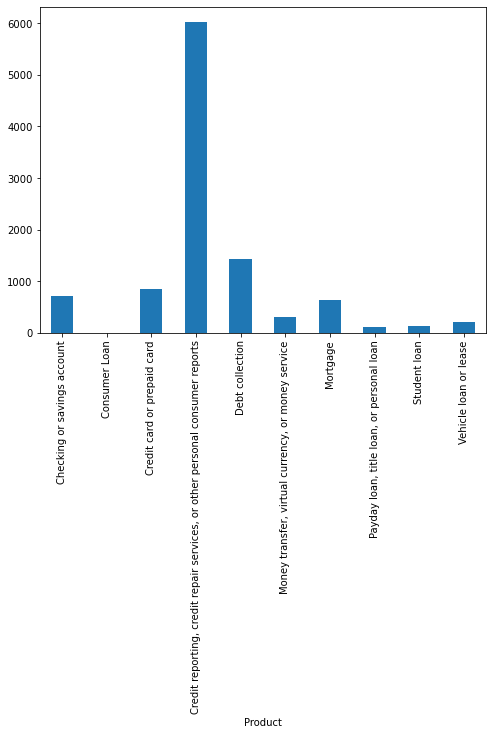

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.Consumer_complaint_narrative).toarray()
labels = df.category_id
features.shape

(10406, 24696)

In [27]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# 'Checking or savings account':
  . Most correlated unigrams:
       . deposit
       . bank
  . Most correlated bigrams:
       . wells fargo
       . checking account
# 'Consumer Loan':
  . Most correlated unigrams:
       . holiday
       . investors
  . Most correlated bigrams:
       . sounded like
       . got car
# 'Credit card or prepaid card':
  . Most correlated unigrams:
       . citi
       . card
  . Most correlated bigrams:
       . american express
       . credit card
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Most correlated unigrams:
       . section
       . reporting
  . Most correlated bigrams:
       . 15 1681
       . 1681 section
# 'Debt collection':
  . Most correlated unigrams:
       . collection
       . debt
  . Most correlated bigrams:
       . alleged debt
       . collect debt
# 'Money transfer, virtual currency, or money service':
  . Most correlated unigrams:
       . crypto
       . paypal
  . Most correlate

se utiliza Naive Bayes classifier for multinomial models parea entrenamiento 

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint_narrative'], df['Product'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

/Users/alder.lopez/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/Users/alder.lopez/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/Users/alder.lopez/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/Users/alder.lopez/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least popula

/Users/alder.lopez/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/alder.lopez/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/alder.lopez/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1407, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/alder.lopez/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/alder.lopez/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/alder.lopez/opt/anaconda3/lib/py

De acuerdo a un mensaje se clasifica la posible razon del reporte. 

In [49]:
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['Credit reporting, credit repair services, or other personal consumer reports']


De acuerdo a un mensaje se clasifica la posible razon del reporte. 

In [31]:
print(clf.predict(count_vect.transform(["I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"])))

['Credit reporting, credit repair services, or other personal consumer reports']


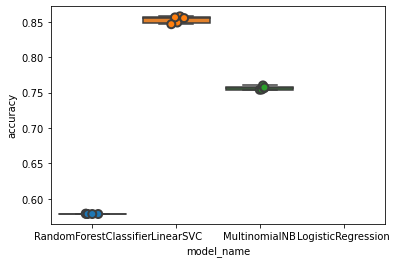

<Figure size 432x864 with 0 Axes>

In [32]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.figure(figsize=(6, 12))
plt.show()

En el grafico se puede observar que la presicion de LinearSVC tiene una mejor presicion

In [33]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.853065
LogisticRegression             NaN
MultinomialNB             0.756487
RandomForestClassifier    0.578705
Name: accuracy, dtype: float64

Entrenamiento usando LinearSVC

In [51]:
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

de acuerdo a la matriz de confusion se puede ver que de acuerdo a los datos actuales y la presicion de la prediccion.


La matriz de confusión se usa paa valorar cómo de bueno es un modelo clasificación basado en aprendizaje automático. En particular, sirve para mostrar de forma explícita cuándo una clase es confundida con otra, lo cual nos, permite trabajar de forma separada con distintos tipos de error. 

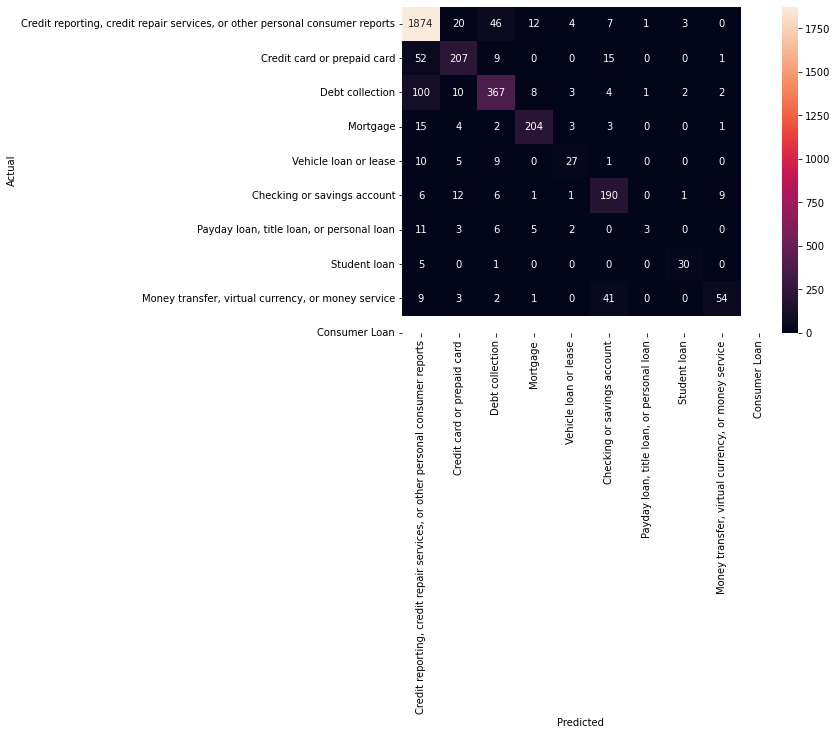

In [35]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# se muestra el como se obtuvo las predicciones 

In [36]:
from IPython.display import display

for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 6:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Product', 'Consumer_complaint_narrative']])
      print('')

'Credit card or prepaid card' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 52 examples.


,Product,Consumer_complaint_narrative
3446,Credit card or prepaid card,This complaint is lodged against Synchrony Ban...
16749,Credit card or prepaid card,I have been an account holder on my Citibank S...
5240,Credit card or prepaid card,"Hi, My name is XXXX XXXX contacting the CFPB r..."
7359,Credit card or prepaid card,I started a dispute with my crypto.com card co...
14506,Credit card or prepaid card,In recent days I opened a new credit card with...
12451,Credit card or prepaid card,XXXX closed my account. This XXXX XXXX XXXX wa...
3403,Credit card or prepaid card,XXXX I lived XXXX XXXXXXXX with my sister unti...
7797,Credit card or prepaid card,"On XX/XX/XXXX, I was issued a {$100.00} condit..."
12972,Credit card or prepaid card,My identity was stolen by my adopted son and h...
32695,Credit card or prepaid card,"On XX/XX/XXXX, I applied for a Best Buy Credit..."



'Debt collection' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 100 examples.


,Product,Consumer_complaint_narrative
12031,Debt collection,XX/XX/XXXX To whom it may concern : I would li...
17900,Debt collection,"On XX/XX/XXXX, I filed a dispute for the inacc..."
19749,Debt collection,On XX/XX/2022 I accepted an agreement to make ...
26246,Debt collection,I have asked to verify this account with my si...
1995,Debt collection,Transworld System violated my consumer rights ...
...,...,...
21419,Debt collection,You violated my rights Under 15 U.S.C. 1681i (...
2940,Debt collection,I have never done business with this company a...
15186,Debt collection,This was not sent in error ako ay isang consum...
21961,Debt collection,"I was seeking federal funding, and I checked c..."



'Mortgage' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 15 examples.


,Product,Consumer_complaint_narrative
30786,Mortgage,"On XX/XX/XXXX, my automatic mortgage payment f..."
3269,Mortgage,This related to an ongoing issue which BSI has...
432,Mortgage,see attached email from XXXX addressing the ba...
25644,Mortgage,"I sold my house, and paid the loan balance in ..."
17221,Mortgage,I had XXXX on my XXXX so I'm out of work for ...
28473,Mortgage,I got a letter from Lakeview Loan Servicing th...
18629,Mortgage,"I, XXXX XXXX the natural consumer sent Guild M..."
5192,Mortgage,My mortgage has changed hands multiple times a...
21983,Mortgage,Wells Fargo cashed a check in 2017 and didn't ...
31965,Mortgage,"In XX/XX/XXXX, I requested and was approved fo..."



'Vehicle loan or lease' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 10 examples.


,Product,Consumer_complaint_narrative
2681,Vehicle loan or lease,I was seeking information on a auto refinance ...
20752,Vehicle loan or lease,I contacted Carvana about possibly purchasing ...
23716,Vehicle loan or lease,The XXXX account with the account number XXXXw...
12413,Vehicle loan or lease,I was not disclosed on the XXXX and XXXX Contr...
3396,Vehicle loan or lease,I applied for an auto loan ; my credit score i...
8316,Vehicle loan or lease,"After filing bankruptcy on XX/XX/XXXX, the GM ..."
19473,Vehicle loan or lease,I am an XXXX XXXX in the XXXX stationed at XXX...
8563,Vehicle loan or lease,My checks are being garnished by a collection ...
11242,Vehicle loan or lease,I have tried to fix this several times with th...
20337,Vehicle loan or lease,Im having a huge issue with Santander Consumer...



'Checking or savings account' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 6 examples.


,Product,Consumer_complaint_narrative
23808,Checking or savings account,An unknown person stole my identity about a mo...
16024,Checking or savings account,I met an online Bitcoin investor/miner on XXXX...
20875,Checking or savings account,BOA charged me month fee for XXXX $ in XXXX
16018,Checking or savings account,Hello my name is XXXX XXXX It's a few things b...
28447,Checking or savings account,Letter sent to the bank on XX/XX/XXXX. Tried f...
22051,Checking or savings account,This is not a duplicate complaint. This is abo...



'Payday loan, title loan, or personal loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 11 examples.


,Product,Consumer_complaint_narrative
2921,"Payday loan, title loan, or personal loan",I had gotten sick from XXXX which lead to me b...
24591,"Payday loan, title loan, or personal loan",Upgrade claims to report to all major credit b...
20835,"Payday loan, title loan, or personal loan",On XX/XX/XXXX XXXX I entered into an agreement...
20358,"Payday loan, title loan, or personal loan",I applied for a joint account on XX/XX/2021 wi...
11899,"Payday loan, title loan, or personal loan",I have been victimized by XXXX XXXX XXXX XXXX ...
22585,"Payday loan, title loan, or personal loan","Usually, a day after my due date payment on my..."
12789,"Payday loan, title loan, or personal loan",I have tried with TransUnion to remove the lat...
24694,"Payday loan, title loan, or personal loan",I have a loan with Credit Acceptance. I have a...
19868,"Payday loan, title loan, or personal loan","With my recent credit report, there is late pa..."
18786,"Payday loan, title loan, or personal loan",Loan provider contacted me in XXXX to inquire ...



'Money transfer, virtual currency, or money service' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 9 examples.


,Product,Consumer_complaint_narrative
28623,"Money transfer, virtual currency, or money ser...",Im trying to exchange damaged bills in differe...
23041,"Money transfer, virtual currency, or money ser...",Im demanding my remedy being that the FCRA say...
6304,"Money transfer, virtual currency, or money ser...",I have reached out several times to the compan...
6532,"Money transfer, virtual currency, or money ser...",I am a small business owner of a XXXXXXXX XXXX...
14610,"Money transfer, virtual currency, or money ser...",Approximately 4 months ago XXXX/XXXX/2021 I ch...
12207,"Money transfer, virtual currency, or money ser...","On XX/XX/2022, in an attempt to clear up the c..."
15474,"Money transfer, virtual currency, or money ser...",Venmo froze my account and never refunded my b...
19430,"Money transfer, virtual currency, or money ser...","Commencing on or about XX/XX/2021, I fell vict..."
22641,"Money transfer, virtual currency, or money ser...","Commencing on or about XX/XX/2021, I fell vict..."


IndexError: index 9 is out of bounds for axis 0 with size 9

In [37]:
model.fit(features, labels)
from sklearn.feature_selection import chi2

N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'Checking or savings account':
  . Top unigrams:
       . bank
       . checking
  . Top bigrams:
       . debit card
       . checking account
# 'Consumer Loan':
  . Top unigrams:
       . investors
       . holiday
  . Top bigrams:
       . got car
       . finance xxxx
# 'Credit card or prepaid card':
  . Top unigrams:
       . card
       . citi
  . Top bigrams:
       . american express
       . did open
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Top unigrams:
       . experian
       . transunion
  . Top bigrams:
       . ran credit
       . xxxx xxxx
# 'Debt collection':
  . Top unigrams:
       . debt
       . collect
  . Top bigrams:
       . trade commisions
       . commisions identity
# 'Money transfer, virtual currency, or money service':
  . Top unigrams:
       . paypal
       . crypto
  . Top bigrams:
       . paypal account
       . xxxx transaction
# 'Mortgage':
  . Top unigrams:
       . mortgage
       . escrow
  . Top bi

In [38]:
texts = ["I requested a home loan modification through Bank of America. Bank of America never got back to me.",
         "It has been difficult for me to find my past due balance. I missed a regular monthly payment",
         "I can't get the money out of the country.",
         "I have no money to pay my tuition",
         "Coinbase closed my account for no reason and furthermore refused to give me a reason despite dozens of request"]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
  print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(id_to_category[predicted]))
  print("")

"I requested a home loan modification through Bank of America. Bank of America never got back to me."
  - Predicted as: 'Mortgage'

"It has been difficult for me to find my past due balance. I missed a regular monthly payment"
  - Predicted as: 'Credit reporting, credit repair services, or other personal consumer reports'

"I can't get the money out of the country."
  - Predicted as: 'Checking or savings account'

"I have no money to pay my tuition"
  - Predicted as: 'Money transfer, virtual currency, or money service'

"Coinbase closed my account for no reason and furthermore refused to give me a reason despite dozens of request"
  - Predicted as: 'Credit card or prepaid card'



Se realiza las predicciones en relacion a los mensajes por parte del usuario , se predice el posible motivo de la interaccion 


In [39]:
print(df['Product'].unique())

['Credit reporting, credit repair services, or other personal consumer reports'
 'Credit card or prepaid card' 'Debt collection' 'Mortgage'
 'Vehicle loan or lease' 'Checking or savings account'
 'Payday loan, title loan, or personal loan' 'Student loan'
 'Money transfer, virtual currency, or money service' 'Consumer Loan']


In [40]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1967
           1       0.78      0.73      0.76       284
           2       0.82      0.74      0.78       497
           3       0.88      0.88      0.88       232
           4       0.68      0.52      0.59        52
           5       0.73      0.84      0.78       226
           6       0.60      0.10      0.17        30
           7       0.83      0.83      0.83        36
           8       0.81      0.49      0.61       110

    accuracy                           0.86      3434
   macro avg       0.78      0.68      0.70      3434
weighted avg       0.86      0.86      0.85      3434



 de acuerdo a la tabla anterior vemos la presicion 